- *Ev Fiyatları veri seti üzerinde, lineer regresyon varsayımlarını kontrol ediniz.*

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [126]:
df = pd.read_csv("house.csv")

In [160]:
df.head(3)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Verinin Temizlenmesi

In [ ]:
for col in df.columns:
    if (df[col].dtype == object) and (len(df[col].unique()) <= 100):
        print(f"{col} : {df[col].unique()}")
        print(50*"-")

In [161]:
df_cat = df[df.select_dtypes(include = ["object"]).columns]
df_num = df[df.select_dtypes(exclude = ["object"]).columns]

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(20)

In [131]:
df = df.drop(df.loc[df['Electrical'].isnull()].index)

In [132]:
df = df.drop((missing[missing['Total'] > 0]).index,1)

In [143]:
df_cat = pd.get_dummies(df_cat)

In [171]:
df_all = pd.concat([df_cat,df_num],axis=1)

#### MODEL

In [199]:
(df_all.corr().SalePrice[df_all.corr().SalePrice > 0.4]).sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.791069
GrLivArea       0.708618
GarageCars      0.640473
GarageArea      0.623423
TotalBsmtSF     0.613905
1stFlrSF        0.605968
FullBath        0.560881
TotRmsAbvGrd    0.533779
YearBuilt       0.523273
YearRemodAdd    0.507430
Fireplaces      0.466968
Errors          0.441012
Name: SalePrice, dtype: float64

In [154]:
Y = df_all['SalePrice']
X = df_all[['OverallQual', 'GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','KitchenQual_Ex','Foundation_PConc','Fireplaces','ExterQual_Gd','ExterQual_Ex','HeatingQC_Ex','Neighborhood_NridgHt']]

In [190]:
model = LinearRegression().fit(X, Y)
prediction = model.predict(X)

In [192]:
print('Değişkenler:', model.coef_)
print('Sabit Değer:', model.intercept_)

Değişkenler: [27118.92768753    50.6704471  21279.49013845]
Sabit Değer: -98890.45046925682


In [198]:
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1374.
Date:                Tue, 31 Mar 2020   Prob (F-statistic):               0.00
Time:                        23:25:55   Log-Likelihood:                -17552.
No. Observations:                1459   AIC:                         3.511e+04
Df Residuals:                    1455   BIC:                         3.513e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.889e+04   4846.100    -20.406      0.000   -1.08e+05   -8.94e+04
OverallQual  2.712e+04   1072.977     25.274      0.000     2.5e+04    2.92e+04
GrLivArea      50.6704      2.552     19.852      0.000      45.664      55.677
GarageCars   2.128e+04   1808.129     11.769      0.000    1.77e+04    2.48e+04
==============================================================================
Omnibus:                      419.659   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9560.050
Skew:                           0.788   Prob(JB):                         0.00
Kurtosis:                      15.441   Cond. No.                     7.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Varsayım 1
Modelin katsayıları ve hedefi lineer olmalıdır.

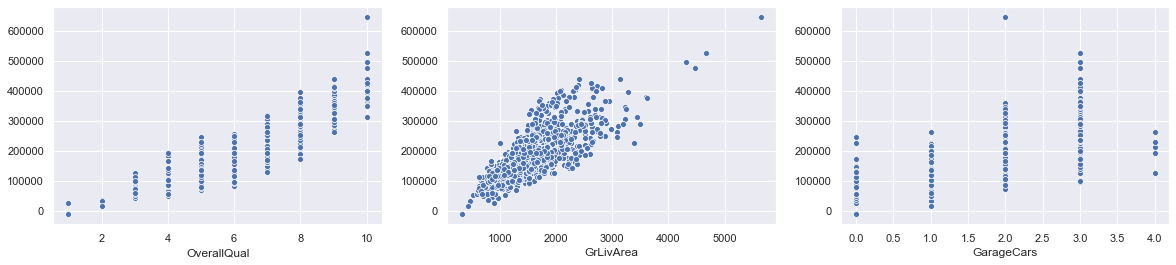

In [165]:
feat = ['OverallQual', 'GrLivArea', 'GarageCars']
plt.figure(figsize=(20,4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=df[feat[i]], y=prediction)
    plt.ylabel('')
    plt.xlabel(feat[i])

#### Varsayım 2
Hata terimlerinin ortalaması 0 olmalıdır.

In [166]:
errors = Y - prediction

In [173]:
print("Ortalama Hata: {:.19f}".format(np.mean(errors)))

Ortalama Hata: -0.0000000002134413885


#### Varsayım 3
Modelin homoscedasticity davranış sergilemesi beklenir.
- Grafikten varyansın büyüdüğü görülüyor ve p-değerleri 0.05'den küçüktür; heteroscedastic davranış sergilemektedir.

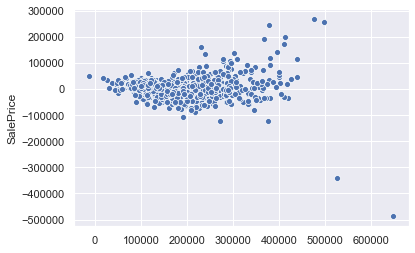

In [174]:
sns.scatterplot(x=prediction, y=errors)
plt.show()

In [175]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(prediction, errors)
lev_stats = levene(prediction, errors)

print("Bartlett Değeri: {0:3g} ve p değeri : {1:.15f}".format(bart_stats[0], bart_stats[1]))
print("Levene Değeri  : {0:3g} ve p değeri : {1:.15f}".format(lev_stats[0], lev_stats[1]))

Bartlett Değeri: 681.168 ve p değeri : 0.000000000000000
Levene Değeri  : 545.706 ve p değeri : 0.000000000000000


#### Varsayım 4

Özelliklerin birbiriyle zayıf ilişkisi (low multicollinearity) olmalıdır. 
- Özellikler arsındaki korelasyon yeterince yüksek görünüyor.

In [181]:
X = df_all[['OverallQual', 'GrLivArea','GarageCars']]
X.corr()

,OverallQual,GrLivArea,GarageCars
OverallQual,1.000000,0.593021,0.600991
GrLivArea,0.593021,1.000000,0.467321
GarageCars,0.600991,0.467321,1.000000


#### Varsayım 5
Hata terimleri birbiriyle ilişkisiz olmalıdır.

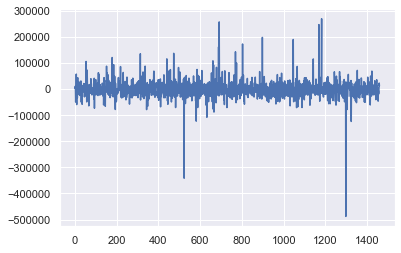

In [182]:
plt.plot(errors)
plt.show()

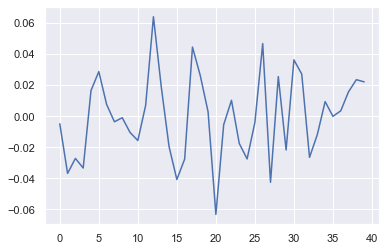

In [183]:
from statsmodels.tsa.stattools import acf

plt.plot(acf(errors)[1:])
plt.show()

#### Varsayım 6
Özellikler hatalarla ilişkili olmamalıdır.

In [185]:
df_all['Errors'] = errors
exogeneity = df_all[['OverallQual', 'GrLivArea','GarageCars', 'Errors']]
exogeneity.corr()

,OverallQual,GrLivArea,GarageCars,Errors
OverallQual,1.000000e+00,5.930208e-01,6.009909e-01,6.551834e-15
GrLivArea,5.930208e-01,1.000000e+00,4.673209e-01,4.531300e-14
GarageCars,6.009909e-01,4.673209e-01,1.000000e+00,4.932495e-15
Errors,6.551834e-15,4.531300e-14,4.932495e-15,1.000000e+00


#### Hataların Normalliği
Hata terimleri normal olarak dağıtılmalıdır.
- Modelin hatalarının normal(lineer grafik, çan eğrisi, p-değeri = 0) dağılmadığı görülmektedir. 

In [186]:
randomNumber = np.random.normal(np.mean(errors), np.std(errors), len(errors))

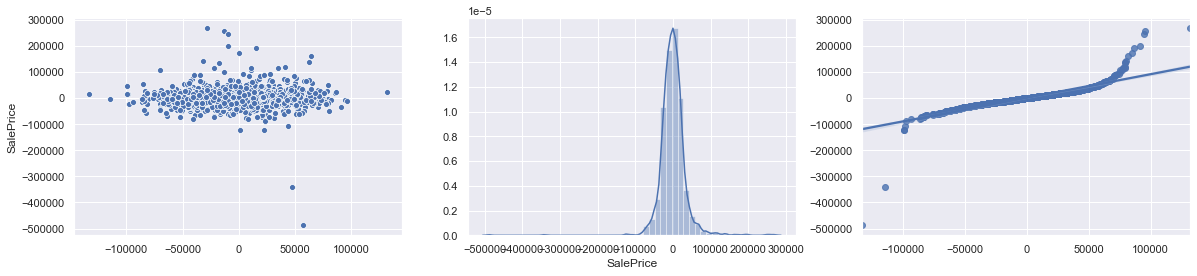

In [197]:
plt.figure(figsize=(20,4))

plt.subplot(1, 3, 1)
sns.scatterplot(x=randomNumber, y=errors)
plt.subplot(1, 3, 2)
sns.distplot(errors)
plt.subplot(1, 3, 3)
sns.regplot(np.sort(randomNumber), np.sort(errors))
plt.show()

In [188]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [189]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test değeri : {0:.6f} ve p değeri : {1:.15f}".format(jb_stats[0], jb_stats[1]))
print("Normal test değeri      : {0:.6f} ve p değeri : {1:.15f}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test değeri : 95165.349342 ve p değeri : 0.000000000000000
Normal test değeri      : 658.885757 ve p değeri : 0.000000000000000
